In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import morton
# import lib

In [2]:
# Declare constants
SNOW_FOX_REFERENCE_DATA = 'SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/reference-roundabout'
SNOW_FOX_DATA = 'SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/data-roundabout'
SNOW_FOX_REFERENCE_META_DATA ='SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/reference-roundabout/reference-roundabout.meta.csv'

In [3]:
# Load data
# Possible columns: sample_ts;lat;lon;northHeading;groundSpeed;SteeringWhlAngle;IMULatAcceleration;IMULgtAcceleration;IMUVerAcceleration;IMURollRate;IMUYawRate
df = pd.read_csv(SNOW_FOX_REFERENCE_META_DATA, sep=';', usecols = ['sample_ts','IMULatAcceleration','IMULgtAcceleration'])
# Preprocess of the data
df=df.dropna()
offset = abs(df.iloc[:,1:2].min())
multiplier = 10000 # predefined
df['IMULatAcceleration']= df['IMULatAcceleration'].add(2)
df['IMULgtAcceleration']= df['IMULgtAcceleration'].add(2)
df['IMULatAcceleration'] = df['IMULatAcceleration'].multiply(multiplier)
df['IMULgtAcceleration'] = df['IMULgtAcceleration'].multiply(multiplier)



m = morton.Morton(dimensions=2, bits=18)
def set_value(row):    
    return m.pack(int(row['IMULatAcceleration']), int(row['IMULgtAcceleration']))

df['morton'] = df.apply(set_value, axis=1)
df
# Data validation

,sample_ts,IMULatAcceleration,IMULgtAcceleration,morton
3559,1584853141014223,18385.0,17705.0,808933763
3560,1584853141024217,18725.0,16855.0,809739835
3561,1584853141034293,17705.0,17365.0,807118435
3562,1584853141044154,17195.0,17875.0,807904847
3563,1584853141054078,16855.0,17875.0,807662367
...,...,...,...,...
5646,1584853161954477,26970.0,27395.0,1019941198
5647,1584853161964227,26545.0,28330.0,1019071881
5648,1584853161974297,27735.0,27820.0,1022400949
5649,1584853161984135,27650.0,27905.0,1022492676


Diagramm incomming...


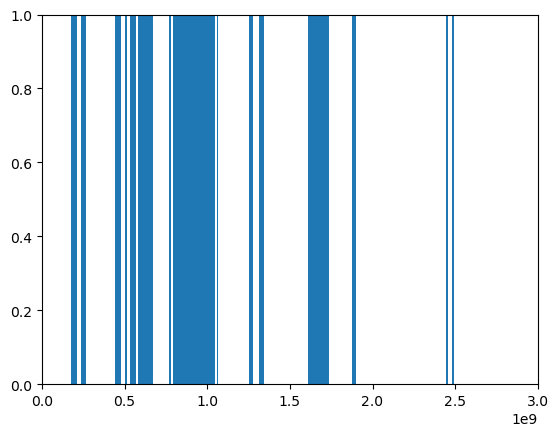

In [4]:
# Plot CSP on ts
min = df['morton'].min()
max = df['morton'].max()
max = 3000000000

print("Diagramm incomming...")

plt.hist(df['morton'], bins=200)
plt.xlim(0,max)
plt.ylim(0,1)
plt.show()

line_off_set=2
line_length=1


 ...]

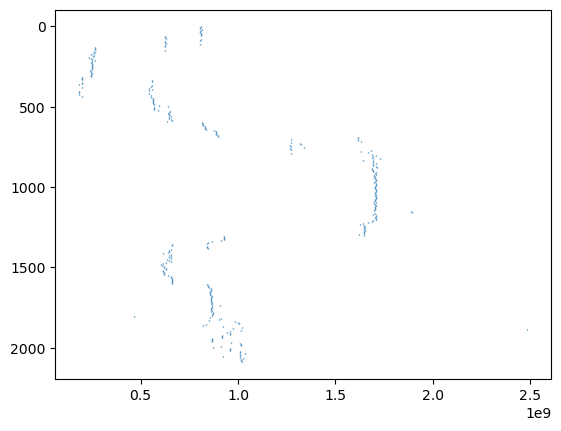

In [5]:
df_morton_ts= df.loc[:,['sample_ts','morton']]

df_result= df_morton_ts.copy()
df_demo=df_result.iloc[:,1:]
plt.gca().invert_yaxis()
plt.eventplot(df_demo.values.tolist(),orientation='horizontal',lineoffsets=1,linelengths=1,linewidths=1)


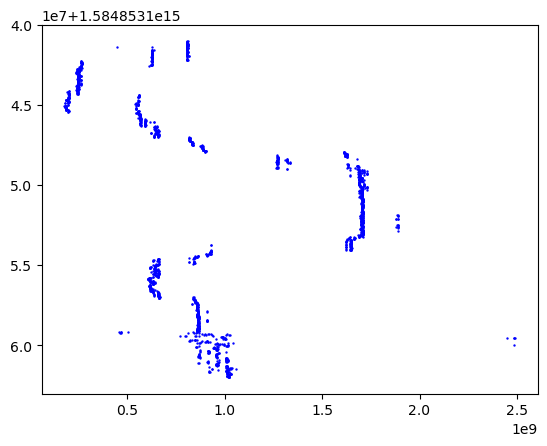

In [6]:
plt.gca().invert_yaxis()
plt.scatter(x=df_result['morton'],y=df_result['sample_ts'],c='blue',s=0.5)
# define the window size we want to obeserve
# screen_widow_siz = 10
# number_of_lags =5

# for lag in range(1,number_of_lags+1):
#     laggedData = df_morton_ts['morton'].shift(lag)
#     df_result=pd.concat((df_result, laggedData.rename('morton_lag_'+str(lag))), axis=1)
# df_result=df_result.dropna()
# # find how many ticks to plot
# df_demo=df_result.iloc[:screen_widow_siz,1:]
# # print(df_demo)

# plt.eventplot(df_demo.values.tolist(),orientation='horizontal', lineoffsets=2,linelengths=1,linewidths=1)


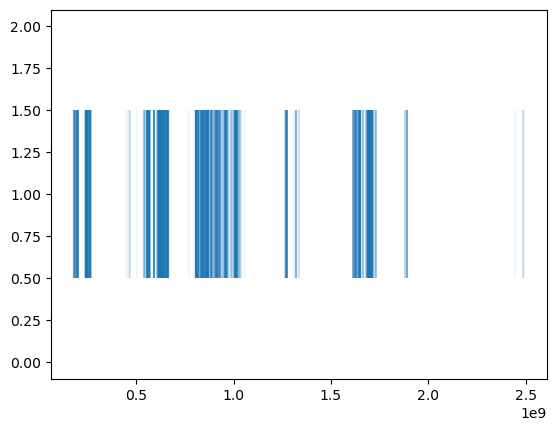

In [11]:
plt.eventplot(df_morton_ts['morton'],orientation='horizontal',linewidths=0.1)


/var/folders/fm/z_773gfs2d3cd8ch6mq3_s3r0000gn/T/ipykernel_35134/236729837.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


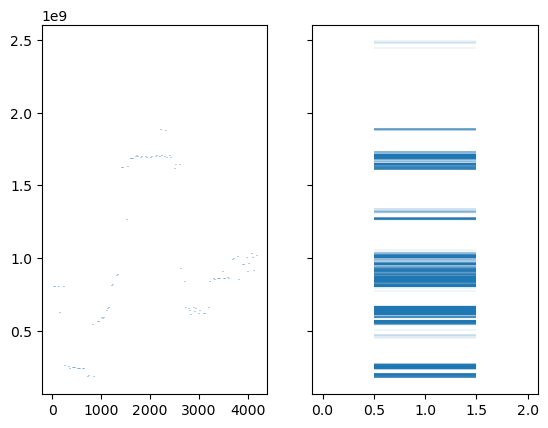

In [8]:
# plot with same y axis
fig,ax=plt.subplots(1,2,sharey='all')
ax[0].eventplot(df_demo.values.tolist(),orientation='vertical', lineoffsets=2,linelengths=1,linewidths=0.5)
ax[1].eventplot(df_morton_ts['morton'],orientation='vertical',linewidths=0.1)
fig.show()

/var/folders/fm/z_773gfs2d3cd8ch6mq3_s3r0000gn/T/ipykernel_35134/2151279153.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


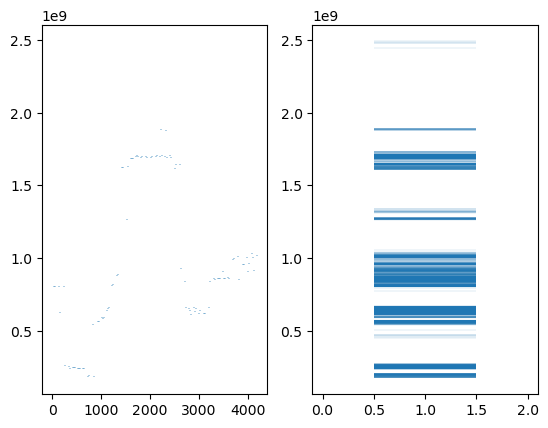

In [9]:
# plot with different y-axis
fig,ax=plt.subplots(1,2)
ax[0].eventplot(df_demo.values.tolist(),orientation='vertical', lineoffsets=2,linelengths=1,linewidths=0.5)
ax[1].eventplot(df_morton_ts['morton'],orientation='vertical',linewidths=0.1)
fig.show()